In [2]:
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://drive.google.com/file/d/1iAv4w6R_NlLnAWh1MkiU-An6OKmqoLF-/view?usp=drive_link

In [3]:
import IPython.display as ipd
import numpy as np
from scipy.fft import fft, fftfreq, fftshift
import librosa
import librosa.display
import math
from scipy.io import wavfile
import soundfile as sf


In [4]:
speech_signal,sr= librosa.load('/content/drive/MyDrive/varsha_speech_signal.wav',sr=16000)
ipd.Audio(speech_signal, rate=sr)

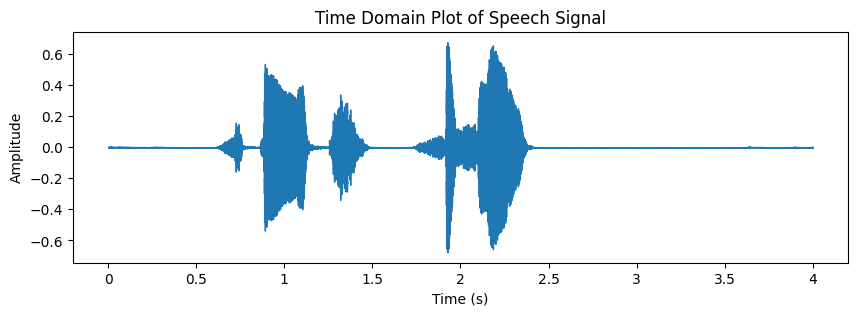

In [5]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(speech_signal, sr=16000);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [31]:
def magnitudeSpectrum(sound):
  sound_len = sound.shape[0]
  sound_dtft = np.fft.fft(sound)
  freqs = fftfreq(sound_len, 1/sr)
  freqs = freqs[0:sound_len//2]
  dtft_lin = np.abs(sound_dtft[0:sound_len//2])
  dtft_db = 20*np.log10(np.abs(sound_dtft[0:sound_len//2]))
  dtft_dabba = np.log10(np.abs(sound_dtft[0:sound_len//2]))
  cepstrum = np.fft.ifft(dtft_dabba)
  cepstr = np.real(cepstrum)
  cepstru = cepstr[0:80]
  return freqs,dtft_lin,dtft_db,cepstru

**VOICED:**

In [7]:
E = speech_signal[int(0.9 * sr): int(1.1 * sr)]
ipd.Audio(E, rate=sr)

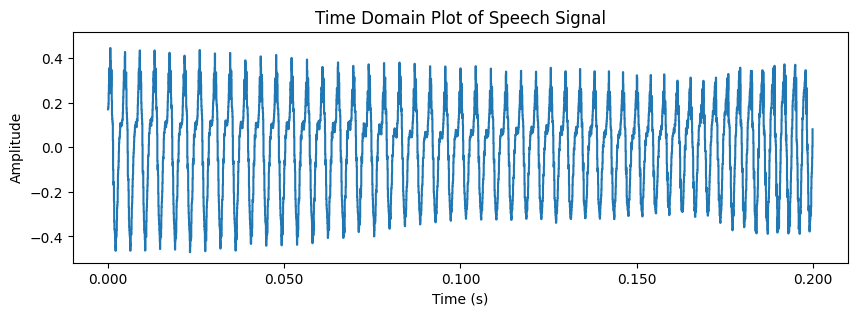

In [8]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(E, sr=16000);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [9]:
E_trim = speech_signal[int(0.99 * sr): int(1.01 * sr)]
ipd.Audio(E_trim, rate=sr)

In [10]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(E_trim, sr=16000);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

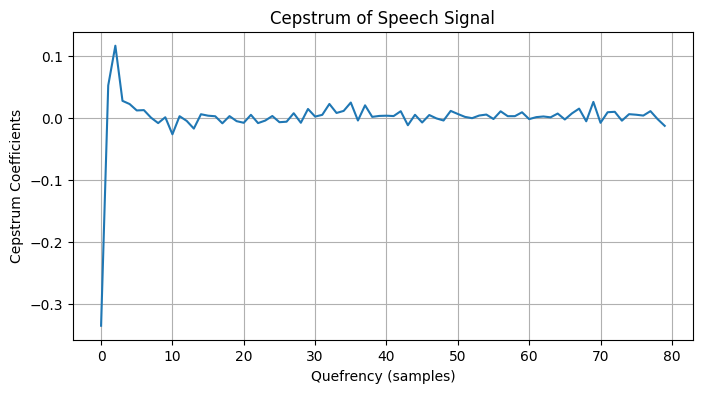

In [32]:
freqs,freq_lin,freq_db,ceps = magnitudeSpectrum(E_trim)
plt.figure(figsize=(8, 4))
plt.plot(ceps)
plt.title("Cepstrum of Speech Signal")
plt.xlabel("Quefrency (samples)")
plt.ylabel("Cepstrum Coefficients")
plt.grid(True)
plt.show()

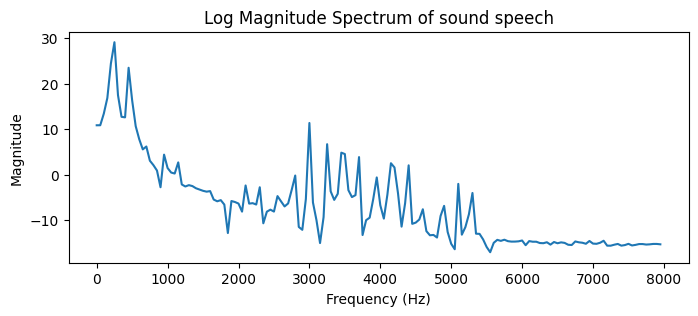

In [33]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound speech")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [42]:
my_array = np.zeros(80)
my_array[:15] = 1
filtered_data = ceps.copy()  # Make a copy to avoid modifying the original data
low_lifter = filtered_data*my_array
formant = np.fft.fft(low_lifter)
formants = np.log10(np.abs(formant[0:40]))
quef = fftfreq(80, 1/16000)
qfreqs = quef[0:40]

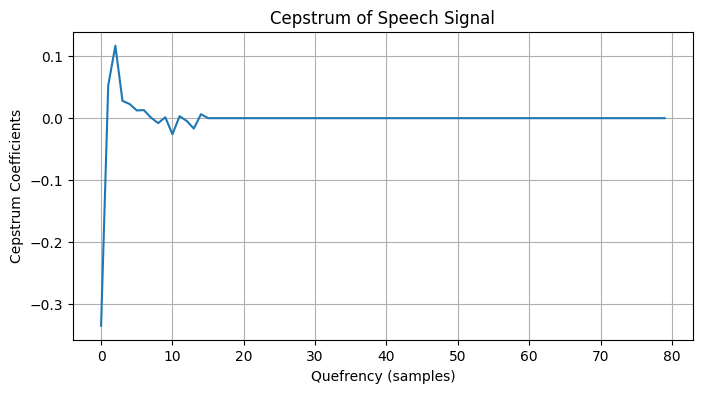

In [36]:
plt.figure(figsize=(8, 4))
plt.plot(low_lifter)
plt.title("Cepstrum of Speech Signal")
plt.xlabel("Quefrency (samples)")
plt.ylabel("Cepstrum Coefficients")
plt.grid(True)
plt.show()

In [38]:
my_arrays = np.zeros(80)
my_arrays[15:160] = 1
filtered_dataset = ceps.copy()  # Make a copy to avoid modifying the original data
high_lifter = filtered_dataset*my_arrays
x_interval = my_arrays[20:140]
y_interval = high_lifter[20:140]
peak_index = np.argmax(y_interval)
peak_x = x_interval[peak_index]
peak_y = y_interval[peak_index]
print(f"Pitch Frequency is {16000/(70)}")

Pitch Frequency is 228.57142857142858


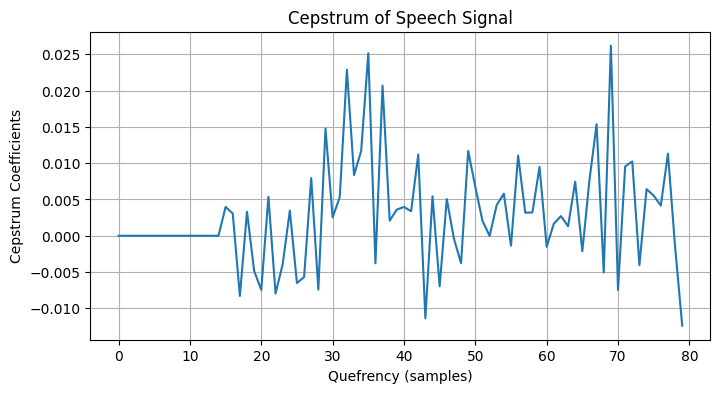

In [39]:
plt.figure(figsize=(8, 4))
plt.plot(high_lifter)
plt.title("Cepstrum of Speech Signal")
plt.xlabel("Quefrency (samples)")
plt.ylabel("Cepstrum Coefficients")
plt.grid(True)
plt.show()

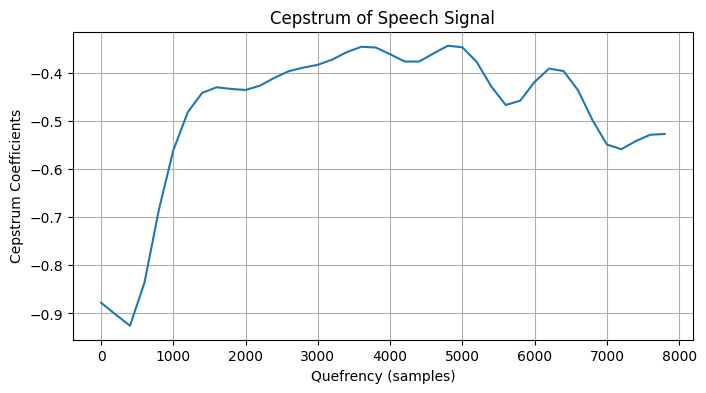

In [43]:
plt.figure(figsize=(8, 4))
plt.plot(qfreqs,formants)
plt.title("Cepstrum of Speech Signal")
plt.xlabel("Quefrency (samples)")
plt.ylabel("Cepstrum Coefficients")
plt.grid(True)
plt.show()

**UNVOICED:**

In [18]:
ch = speech_signal[int(1.25 * sr): int(1.45 * sr)]
ipd.Audio(ch, rate=sr)

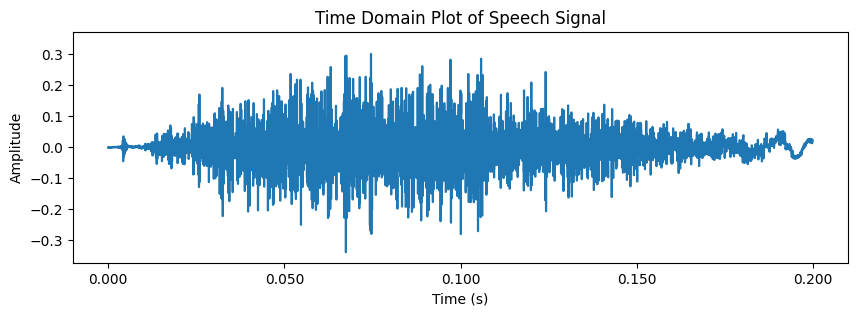

In [19]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(ch, sr=16000);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [44]:
ch_trim = speech_signal[int(1.34 * sr): int(1.36 * sr)]
ipd.Audio(ch_trim, rate=sr)

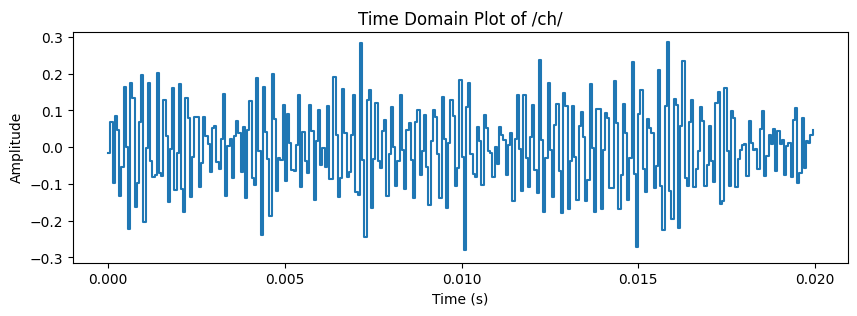

In [45]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(ch_trim, sr=16000);
plt.title("Time Domain Plot of /ch/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

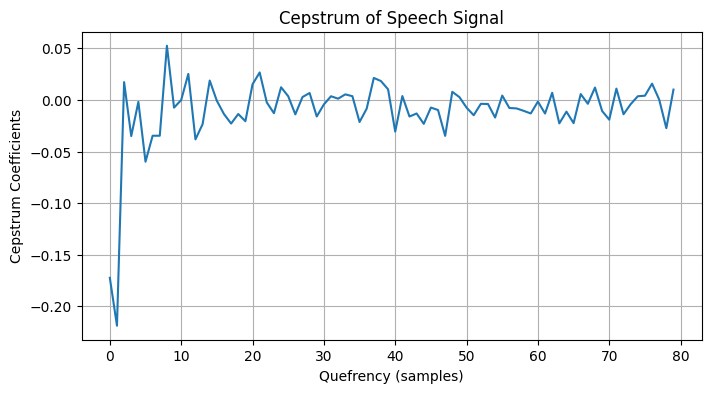

In [50]:
freqs,freq_lin,freq_db,ceps = magnitudeSpectrum(ch_trim)
plt.figure(figsize=(8, 4))
plt.plot(ceps)
plt.title("Cepstrum of Speech Signal")
plt.xlabel("Quefrency (samples)")
plt.ylabel("Cepstrum Coefficients")
plt.grid(True)
plt.show()

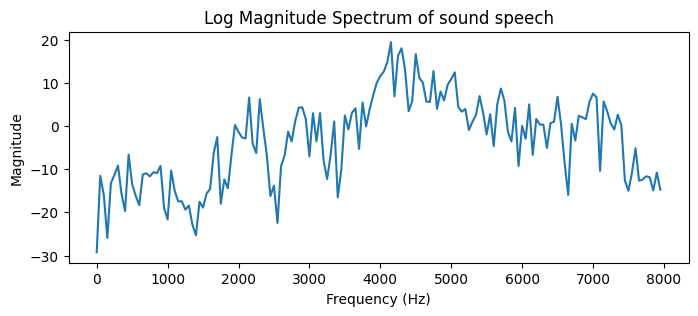

In [51]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound speech")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [52]:
my_array = np.zeros(80)
my_array[:15] = 1
filtered_data = ceps.copy()  # Make a copy to avoid modifying the original data
low_lifter = filtered_data*my_array
formant = np.fft.fft(low_lifter)
formants = np.log10(np.abs(formant[0:40]))
quef = fftfreq(80, 1/16000)
qfreqs = quef[0:40]

In [53]:
plt.figure(figsize=(8, 4))
plt.plot(low_lifter)
plt.title("Cepstrum of Speech Signal")
plt.xlabel("Quefrency (samples)")
plt.ylabel("Cepstrum Coefficients")
plt.grid(True)
plt.show()

In [55]:
my_arrays = np.zeros(80)
my_arrays[15:80] = 1
filtered_dataset = ceps.copy()  # Make a copy to avoid modifying the original data
high_lifter = filtered_dataset*my_arrays

In [56]:
plt.figure(figsize=(8, 4))
plt.plot(high_lifter)
plt.title("Cepstrum of Speech Signal")
plt.xlabel("Quefrency (samples)")
plt.ylabel("Cepstrum Coefficients")
plt.grid(True)
plt.show()

In [57]:
plt.figure(figsize=(8, 4))
plt.plot(qfreqs,formants)
plt.title("Cepstrum of Speech Signal")
plt.xlabel("Quefrency (samples)")
plt.ylabel("Cepstrum Coefficients")
plt.grid(True)
plt.show()